In [1]:
%pylab inline
from soda.profiles import *
from pygadgetreader import *
from astropy import constants as const
from astropy import units as u

font = {'size':18, 'family':'serif'}
matplotlib.rc('font', **font)

H_code = 2.26854550263e-18/units.s # GalIC value


Populating the interactive namespace from numpy and matplotlib


# Finding a MW model:

## 1. Choose a Mvir and C.

## 2. Derive the Mh.

\begin{equation}
M_h(r) = M_N(r)
\end{equation}



\begin{equation}
\dfrac{M_H r^2}{a^2(1+r/a)^2} = 4 \pi \rho_s r_s^3 f(x)
\end{equation}

With: $rho_N = \rho_H$ for $r<<a$ it easy to find that:

\begin{equation}
M_H = 2\pi \rho_s a^2 r_s
\end{equation}

In [2]:
# Some useful functions

# Method from http://adsabs.harvard.edu/abs/2012ApJ...753....8V
def fx(x):
    f = np.log(1.+x) - (x / (1. + x))
    return f

#Computing cvir from c200
def c(cvir, c200):
    q = 2.058
    y = (c200 / cvir) - (fx(c200) / (q * fx(cvir)))**(1./3.)
    return y

def bissection(cvir):
    min_c200 = 0.1
    max_c200 = 2*cvir
    c_init = 0.5 * (min_c200 + max_c200)
    y = c(cvir, c_init)
    while abs(y) > 0.0002:
        #print c_init
        if y>0:
            max_c200 = c_init
        if y<0:
            min_c200 = c_init
        c_init = 0.5*(min_c200 + max_c200)
        y = c(cvir, c_init)
    return c_init

# Compouting a/rs using cvir
def ars(c):
    x = 1 / ((2.0*fx(c))**(-0.5) - (1.0/c)) # Van Der Marel exact solution#
    #x2 = np.sqrt(2.0 * (log(1 + c) - c/(1+c))) # springel approx equation
    return x

# Computing mvir from m200

def mh_mvir(ar, c):
    """
    Computes the total hernquist mass
    from the virial mass.
    
    """
    x = ar**2.0 / (2.0*fx(c)) 
    return x

def M200_Mvir(Mvir, cvir):
    c200 = bissection(cvir)
    M200 = Mvir * fx(c200) / fx(cvir)
    return M200


def hernquist_param(cc, Mvir):
    '''
    Return:
    -------
    Mh: Equivalent Hernquist Mass
    a:  Hernquist scale length 
    rs: NFW scale length
    '''
    a_rs = ars(cc)
    Mh = m200mvir(a_rs, cc) * Mvir
    rs = rvir(Mvir, 0) / cc
    a = a_rs * rs
    return Mh, a.value, rs.value 

def vvir_galIC(Mvir):
    Mvir = Mvir* units.Msun
    G = const.G
    v_vir = ((6.9713700231733506 * H_code*G)*Mvir)**(1/3.)
    return v_vir.to(units.km/units.s)

def Mh_total(CC, Mvir):
    """
    Compute the Hernquist halo parameters and M200, R200.
    """
    # Compoute a_rs ratio
    ars_1 = ars(CC)
    
    # Compute Mh
    Mh = mh_mvir(ars_1, CC)*Mvir
    
    # Compute Rvir
    #Rvir = rvir(Mvir,0)
    Rvir = rvir(Mvir, 0)
    # Compute r_s (of the NFW profile)
    r_s = Rvir/CC
    
    # Compute the scale lenght a of the hernquist profile
    a = r_s*ars_1
    
    # Compute the M200
    M200 = M200_Mvir(Mvir, CC)
    R200 = r200(M200)
    
    return(Mh, Rvir, M200, R200, a, r_s)


def disk_bulge_M(Mvir, Mdisk, Mbulge):
    return Mdisk/Mvir, Mbulge/Mvir

def bulge_scales(a, bulge_size):
    return bulge_size/a
    
#H  (disk)       = 2.91129
#Z0 (disk)       = 0.640484
#A (bulge)       = 0.714457
        

In [3]:
#def rotation_curve(Mhalo, CC, Mdisk, ra, rb, Mbulge, rb):
    

In [4]:
bulge_scales(40.82, 0.71)

0.017393434590886818

In [5]:
#r200(1.03E12)
print(r200(1.2E12), rvir(1.2E12, 0), rvir2(1.2E12, 0))

219.22447787007005 kpc 279.0147766803976 kpc 276.79789253844825 kpc


In [6]:
c200 = bissection(10)
print(c200)
#fx(c200) / fx(10)

7.416748046875


## MW2

In [7]:
## MW2
Mvir = 1.2E12
CC = 15
Mtotal, Rvir, M200, R200, a, r_s = Mh_total(CC, Mvir)
print(Rvir, R200)
print(Mtotal, M200, R200, a)
print(vvir_galIC(Mvir))
print(disk_bulge_M(Mtotal, 5.78E10, 1.4E10))


279.0147766803976 kpc 208.81176536709373 kpc
1.5771299254e+12 1.03700060102e+12 208.81176536709373 kpc 40.852871619537424 kpc
136.06917798290303 km / s
(0.036648851226065045, 0.0088768843800157548)


## MW3 

In [14]:
## MW2
Mvir = 1.6E12
CC = 18
Mtotal, Rvir, M200, R200, a, r_s = Mh_total(CC, Mvir)
print(Rvir, R200)
print(Mtotal, M200, R200, a)
print(vvir_galIC(Mvir))
print(disk_bulge_M(Mtotal, 5.78E10, 1.4E10))

307.0954979884179 kpc 230.6705911254827 kpc
2.02462915759e+12 1.39794729665e+12 230.6705911254827 kpc 38.35530134607776 kpc
149.76350883881346 km / s
(0.028548438010639263, 0.0069148465769714477)


In [9]:
bulge_scales(34.825, 0.71)

0.020387652548456568

## MW2 

In [10]:
## MW2
Mvir = 0.9E12
CC = 15
Mtotal, Rvir, M200, R200, a, r_s = Mh_total(CC, Mvir)
print(Rvir)
print(Mtotal, M200, R200, a)
print(vvir_galIC(Mvir))
print(disk_bulge_M(Mtotal, 5.78E10, 1.4E10))
bulge_scales(a, 0.71)
rvir(Mvir, 0)

253.50174820520553 kpc
1.18284744405e+12 777750450766.0 189.7180794370895 kpc 37.11729714809457 kpc
123.62705268123736 km / s
(0.048865134968086726, 0.011835845840021005)


<Quantity 253.50174820520553 kpc>

In [90]:
sim_MW = readsnap('/media/ngaravito/4fb4fd3d-1665-4892-a18d-bdbb1185a07b/simulations/MW2_40M/MW2_40M_vir_000'
                  , 'pos', /'dm')

SyntaxError: invalid syntax (<ipython-input-90-e60b7d12ccac>, line 2)

In [5]:
mass_MW = readsnap('/media/ngaravito/4fb4fd3d-1665-4892-a18d-bdbb1185a07b/simulations/MW2_40M/MW2_40M_vir_000'
                  , 'mass', 'dm')

Returning DM    Mass


In [6]:
sum(mass_MW)*1E10

1506642303466.7969

In [7]:
mass_MW[0]*1E10

40176.096263166983

In [89]:
x_sim_mw = sim_MW[:,0]
y_sim_mw = sim_MW[:,1]
z_sim_mw = sim_MW[:,2]

NameError: name 'sim_MW' is not defined

In [9]:
max(x_sim_mw)

79225.391

In [87]:
def mass_profile(x, y, z, n_bins, r):
    mp = 40176.096263166983
    R = np.sqrt(x**2 + y**2 + z**2)
    r = np.linspace(0.0, r, n_bins)
    Mass = np.zeros(n_bins)
    for i in range(len(r)):
        dr = np.where(R<r[i])
        dN = len(x[dr])
        Mass[i] = dN * mp
    return Mass, r

In [88]:
r_max = 279
r_pro = np.logspace(0, log10(r_max))

M, R = mass_profile(x_sim_mw, y_sim_mw, z_sim_mw, 20, r_max)

NameError: name 'x_sim_mw' is not defined

In [33]:
rvir(1.1999952910892628E12, 0)

<Quantity 279.01441172000966 kpc>

In [34]:
M_NFW = mass_NFW(15, 0 , r_pro, 0, 1.19E12)
M_Hern = mass_hernquist(39.9, r_pro, 1506642303466.7969)

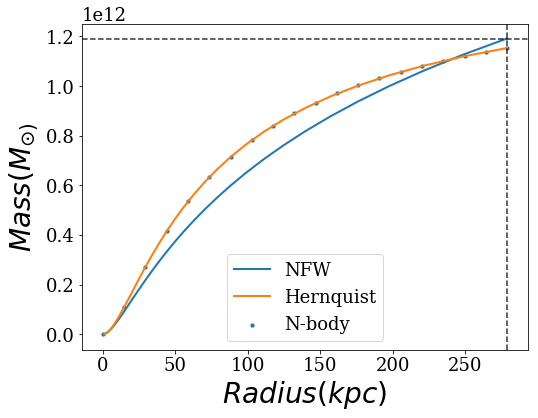

In [37]:
figure(figsize=(8, 6))
plot(r_pro, M_NFW, lw=2, label='NFW')
plot(r_pro, M_Hern, lw=2, label='Hernquist')
scatter(R, M, lw=2, label='N-body', s=5)

axvline(278.832, lw=2, ls='--', c='k', alpha=0.6)
axhline(1.19E12, lw=2, ls='--', c='k', alpha=0.6)
xlabel('$Radius(kpc)$', fontsize=28)
ylabel('$Mass(M_{\odot)}$', fontsize=28)
legend(loc='best')

## note: I think that the miss match is that GalIC have particles way outside Rvir. 

In [93]:
r = linspace(0, 300, 30)
rho_NFW = dens_NFW(15, 0, r, 0, 1E12)

/usr/local/lib/python3.5/dist-packages/astropy/units/quantity.py:951: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)


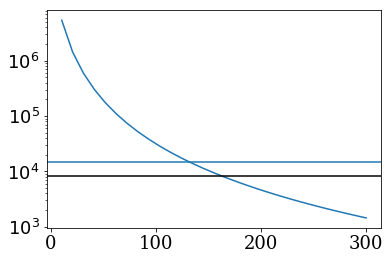

In [102]:
semilogy(r, rho_NFW)
axhline(8157 ,c='k')
axhline(14683)


In [97]:
(rho_crit(0)*0.3*200).to(u.Msun/u.kpc**3) 

<Quantity 8157.306080290386 solMass / kpc3>

In [98]:
(rho_crit(0)*0.3*360).to(u.Msun/u.kpc**3) 

<Quantity 14683.150944522695 solMass / kpc3>